<h1> Library yang digunakan

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

<h1> Pra-proses

Direktori gambar untuk model training

In [11]:
directory_path=r'images'

Pelabelan gambar

In [12]:
label=[]
for i in os.listdir(directory_path):    
    if i.split('_')[0]=='Parasitized':
        label.append("Parasitized")
    elif i.split('_')[0]=='Uninfected':     
        label.append("Uninfected")

Pembuatan fitur

In [13]:
fitur=[]     
for i in os.listdir(directory_path):
    img_train=cv2.imread(os.path.join(directory_path,i))  
    img_train_resize=cv2.resize(img_train,(100,100))
    fitur.append(img_train_resize)

Mengecek info dari gambar / fitur yang dimasukkan

In [14]:
print(np.array(fitur).shape)  

(2000, 100, 100, 3)


<h1> Model Random Forest

In [15]:
X=np.array(fitur)
Y=np.array(label)
X=X.reshape(2000,30000)   

# Split dataset menjadi train dan test
xtrain,xtest,ytrain,ytest=train_test_split(X,Y)

# Melakukan klasifikasi Random Forest
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

# Akurasi Training dan Testing #
# Metode 1
print("Akurasi train: ", rf.score(xtrain,ytrain))
print("Akurasi test: ", rf.score(xtest,ytest))

# Metode 2
ypred = rf.predict(xtest)
print("Akurasi test: ", accuracy_score(ypred,ytest))

Train accuracy:  1.0
Test accuracy:  0.864
Test accuracy:  0.864


<h1> Uji Coba

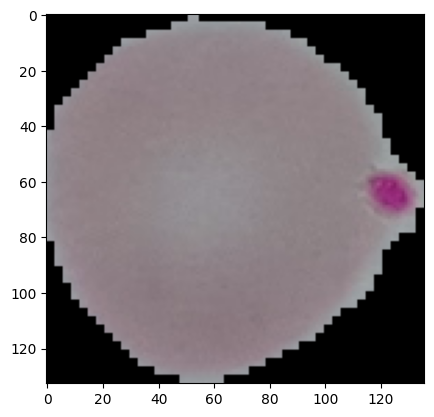

[['Parasitized']]


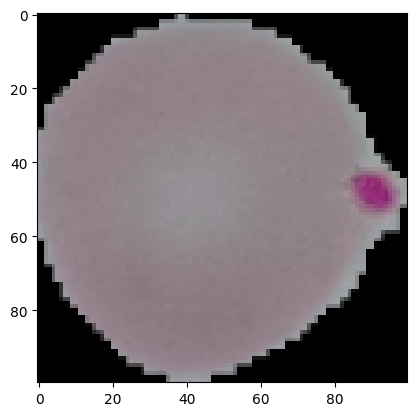

In [16]:
# Baca gambar 
img_path=r"images/Parasitized_(900).png"
img_input=cv2.imread(img_path)  

# Menampilkan gambar masukan
plt.imshow(img_input)  
plt.show() 

# Mengubah gambar menjadi array
img_input_resize = cv2.resize(img_input,(100,100))
array_img=np.array(img_input_resize)
array_img=array_img.reshape(1,30000)

# Mendapatkan hasil dari prediksi model
print(rf.predict(array_img).reshape(1,-1))

# Menampilkan gambar yang menjadi referensi model untuk pembuatan keputusan
plt.imshow(array_img.reshape(100,100,3)) 
plt.show()